# 1.3 Gradient Descent for Temperatures

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [3]:
#Create a path to where your data is stored.
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Machine Learning in Python\Achievement 1\Project Data\\'

In [4]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'DATASET_scaled.csv'))
climate.columns

Index(['Unnamed: 0', 'id', 'DATE', 'MONTH', 'BASEL_cloud_cover',
       'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=172)

In [5]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [6]:
df

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101 -1.599964        -0.528623           -1.016876   
1      19600102 -1.599964        -0.582946           -1.107669   
2      19600103 -1.599964        -0.257010           -1.084971   
3      19600104 -1.599964        -0.555784           -1.209812   
4      19600105 -1.599964        -1.003946           -1.209812   
...         ...       ...              ...                 ...   
22945  20221027  1.013583         0.747959            0.628750   
22946  20221028  1.013583         0.856604            0.367720   
22947  20221029  1.013583         0.856604            0.083991   
22948  20221030  1.013583         0.680055            0.265577   
22949  20221031  1.013583         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKH

#### You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.

In [8]:
# Extract the year from the DATE column
df['YEAR'] = df['DATE'].astype(str).str[:4].astype(int)

In [9]:
df_gdansk = df[['GDANSK_temp_mean', 'YEAR']]

In [10]:
df_gdansk.head()

GDANSK_temp_mean  YEAR
0         -0.927601  1960
1         -0.825294  1960
2         -0.940389  1960
3         -1.042696  1960
4         -0.978754  1960

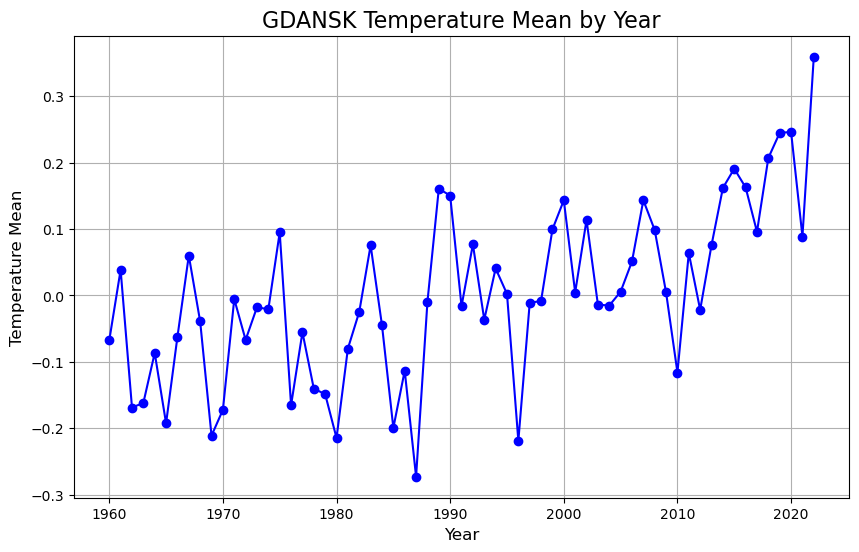

In [11]:
# Group the data by year and calculate the mean temperature for each year
df_yearly = df_gdansk.groupby('YEAR')['GDANSK_temp_mean'].mean()

# Plot the temperature mean by year
plt.figure(figsize=(10, 6))
plt.plot(df_yearly.index, df_yearly.values, marker='o', linestyle='-', color='b')
plt.title('GDANSK Temperature Mean by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Mean', fontsize=12)
plt.grid(True)
plt.show()


In [12]:
# Check the unique years in the dataset
print(df['YEAR'].unique())

[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2021 2022]


In [13]:
# Group by YEAR and calculate mean for all columns
yearly_stats = df.groupby('YEAR').mean()

In [14]:
# Filter the dataset for the chosen year
chosen_year = 2016 # This is the hottest year on record.
df_2016 = df[df['YEAR'] == chosen_year]
df_2016.head()

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
20454  20160101 -1.599964        -0.773075           -1.765920   
20455  20160102 -1.599964        -0.623688           -1.822666   
20456  20160103 -1.599964        -0.650849           -2.401472   
20457  20160104 -1.599964        -0.637268           -2.163140   
20458  20160105 -1.599964        -0.678010           -1.607032   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
20454           -1.828494         -0.937112             -0.709628   
20455           -1.910838         -0.731423             -0.842167   
20456           -2.051999         -0.494089             -0.665448   
20457           -2.251977         -0.683956             -0.783261   
20458           -1.969655         -0.509912             -0.562362   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  ...  \
20454         -1.912304           -0.980032         -0.005705  ...   
20455         -2.155283           -0.770377         -0.005705  ...   
20456         -2.564510           -0.683021         -0.005705  ...   
20457         -2.462203           -0.508308         -0.005705  ...   
20458         -2.500568           -0.630607         -0.005705  ...   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
20454             -0.622191         -0.489554           -0.655331   
20455             -0.412148         -0.907406           -1.032352   
20456             -0.532173         -0.893927           -1.095189   
20457             -0.577182         -0.637824           -0.856409   
20458             -0.517170         -1.096113           -0.642763   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
20454       -0.587025       -0.000746            -0.636209   
20455       -1.036014       -0.000746            -0.416832   
20456       -1.509274       -0.000746            -0.665459   
20457       -1.679162       -0.000746            -0.928711   
20458       -1.715566       -0.000746            -1.001836   

       STOCKHOLM_temp_mean  TOURS_temp_mean  VALENTIA_temp_mean  YEAR  
20454            -0.776730        -0.633824           -0.007287  2016  
20455            -1.286794        -0.335759           -0.007287  2016  
20456            -1.485843        -0.712262           -0.007287  2016  
20457            -1.635130        -0.524011           -0.007287  2016  
20458            -1.896382        -0.696575           -0.007287  2016  

[5 rows x 21 columns]

In [15]:
#Drop the DATE and MONTH and YEAR data as those numbers are not scaled with the rest.
notemp = df_2016.drop(['DATE','MONTH', 'YEAR'], axis=1)

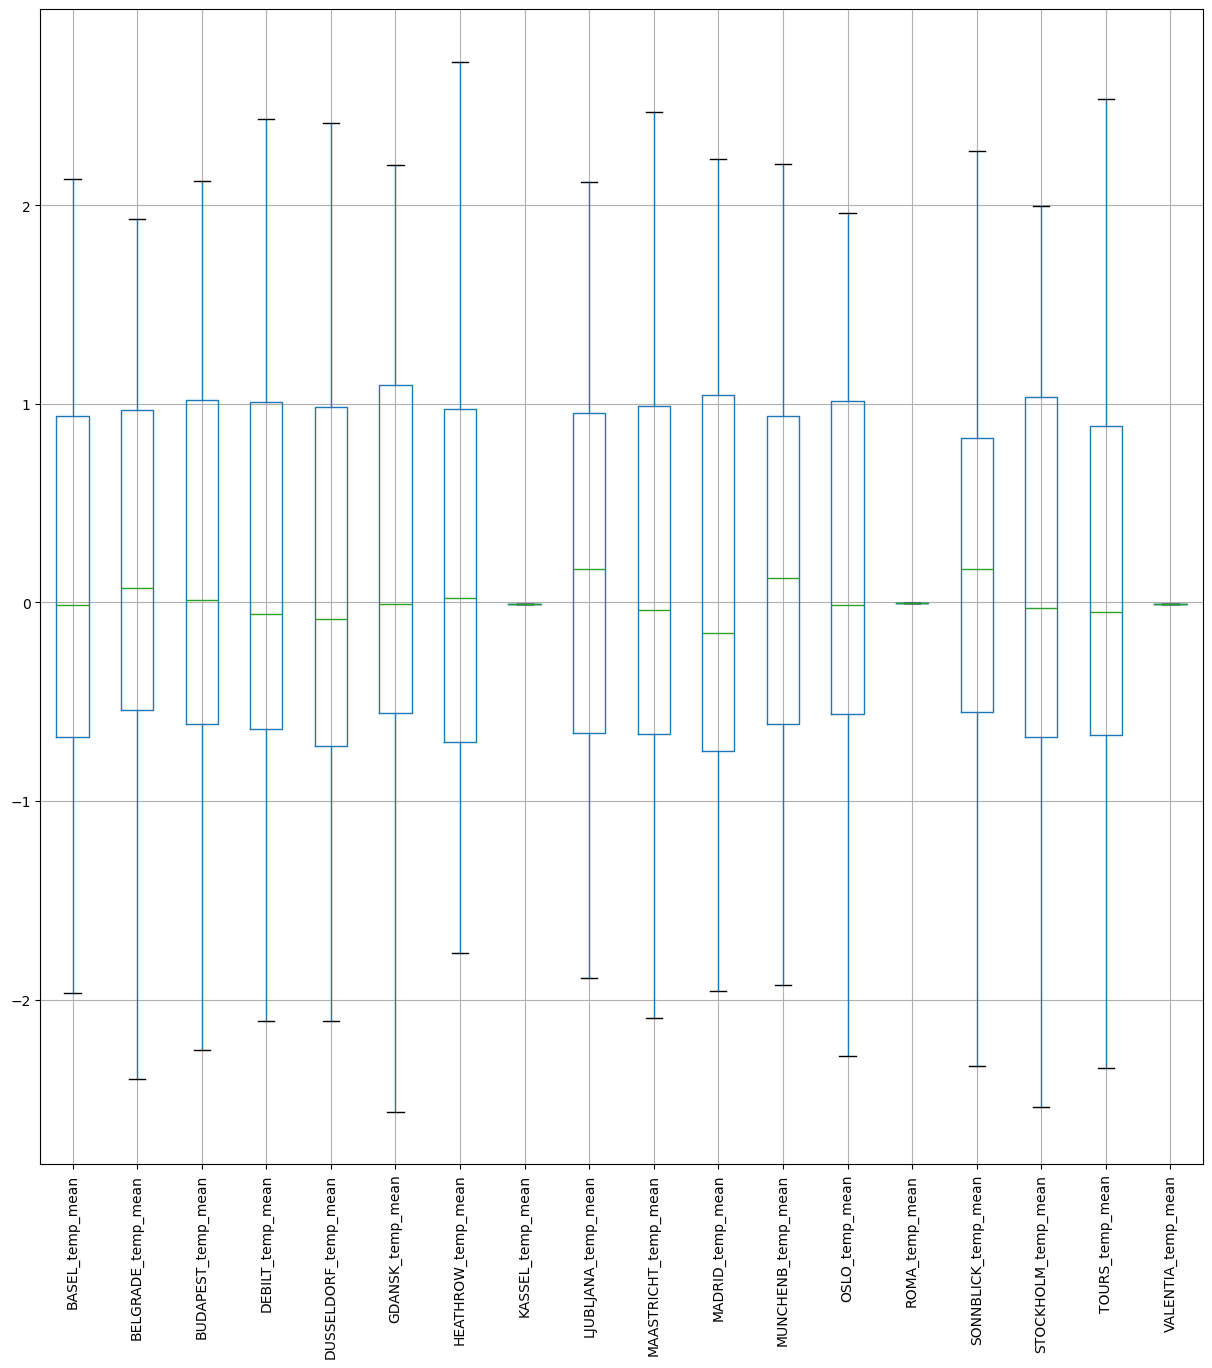

In [16]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

In [17]:
df_2016.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.660000e+02  366.000000       366.000000          366.000000   
mean   2.016067e+07    0.001171         0.087182            0.097511   
std    3.457653e+02    1.003590         0.990375            0.969190   
min    2.016010e+07   -1.599964        -1.968172           -2.401472   
25%    2.016040e+07   -0.728781        -0.678010           -0.540212   
50%    2.016070e+07    0.142401        -0.012558            0.072642   
75%    2.016098e+07    0.940984         0.941483            0.969225   
max    2.016123e+07    1.594371         2.133185            1.933902   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          366.000000        366.000000            366.000000   
mean             0.111600          0.107674              0.067866   
std              0.991446          1.004478              0.995487   
min             -2.251977         -2.107957             -2.108658   
25%             -0.613923         -0.636489             -0.724354   
50%              0.012478         -0.058978             -0.083746   
75%              1.018249          1.009023              0.983935   
max              2.124009          2.433023              2.412418   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  ...  \
count        366.000000          366.000000      3.660000e+02  ...   
mean           0.162659            0.123999     -5.705221e-03  ...   
std            0.961265            1.004566      4.777020e-17  ...   
min           -2.564510           -1.766240     -5.705221e-03  ...   
25%           -0.556739           -0.700492     -5.705221e-03  ...   
50%           -0.006839            0.024566     -5.705221e-03  ...   
75%            1.092959            0.972382     -5.705221e-03  ...   
max            2.205546            2.723877     -5.705221e-03  ...   

       MAASTRICHT_temp_mean  MADRID_temp_mean  MUNCHENB_temp_mean  \
count            366.000000        366.000000          366.000000   
mean               0.100784          0.151108            0.176623   
std                0.994082          1.065482            0.922986   
min               -2.092490         -1.958775           -1.924636   
25%               -0.663450         -0.745657           -0.614487   
50%               -0.037072         -0.152577            0.123846   
75%                0.990637          1.047062            0.937584   
max                2.468437          2.233222            2.210031   

       OSLO_temp_mean  ROMA_temp_mean  SONNBLICK_temp_mean  \
count      366.000000    3.660000e+02           366.000000   
mean         0.102805   -7.461638e-04             0.155584   
std          0.970968    4.451314e-18             0.917509   
min         -2.285904   -7.461638e-04            -2.332720   
25%         -0.559722   -7.461638e-04            -0.552115   
50%         -0.010619   -7.461638e-04             0.168171   
75%          1.014776   -7.461638e-04             0.826301   
max          1.961294   -7.461638e-04             2.274185   

       STOCKHOLM_temp_mean  TOURS_temp_mean  VALENTIA_temp_mean    YEAR  
count           366.000000       366.000000        3.660000e+02   366.0  
mean              0.102880         0.099466       -7.287352e-03  2016.0  
std               0.985372         1.003622        4.603310e-17     0.0  
min              -2.543292        -2.343776       -7.287352e-03  2016.0  
25%              -0.677205        -0.665199       -7.287352e-03  2016.0  
50%              -0.030295        -0.045538       -7.287352e-03  2016.0  
75%               1.033374         0.887876       -7.287352e-03  2016.0  
max               1.997519         2.535077       -7.287352e-03  2016.0  

[8 rows x 21 columns]

In [18]:
#Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year.

In [19]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = df_2016.drop(['DATE','MONTH', 'YEAR'], axis=1)

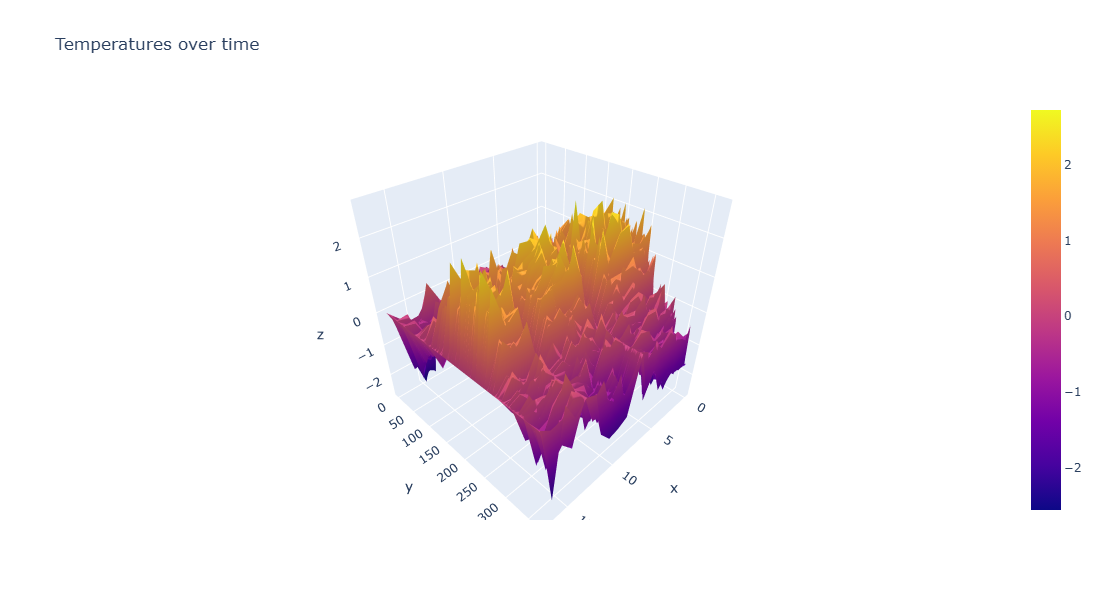

In [20]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [21]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.67,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])

In [22]:
n_rows = df_2016.shape[0]
n_rows

366

In [23]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=df_2016['GDANSK_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [24]:
X.shape, y.shape

((366, 2), (366, 1))

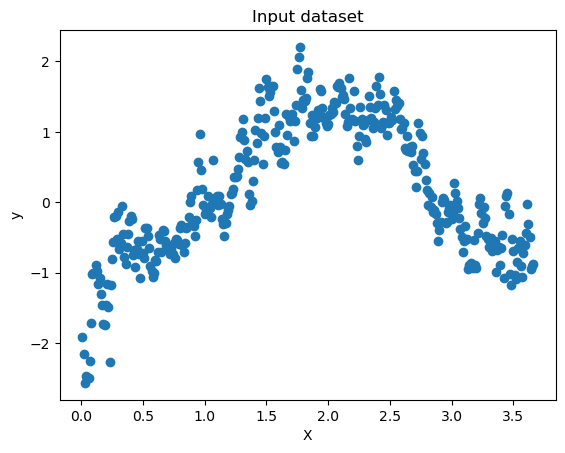

In [25]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=df_2016['GDANSK_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [26]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
df_2016['GDANSK_temp_mean'].min()

-2.56451022104364

In [27]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
df_2016['GDANSK_temp_mean'].max()

2.205545857910139

In [28]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [29]:
compute_cost(X,y)

array([0.47398156])

In [30]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [31]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=100 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[10],[-10]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=.1 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 15.6 ms
Wall time: 111 ms


In [32]:
theta

array([[ 1.21543524],
       [-0.40611706]])

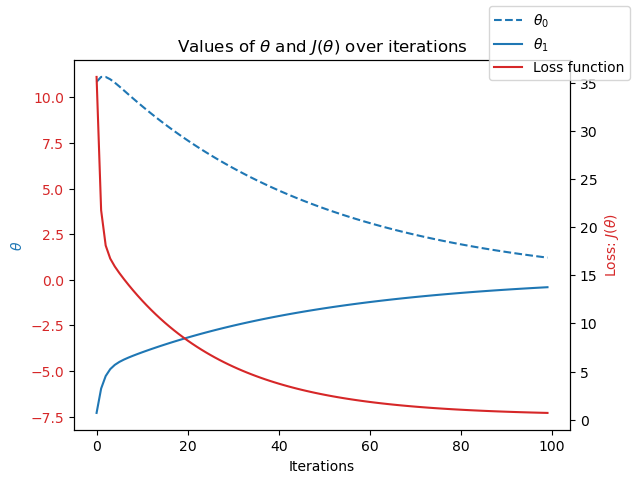

In [33]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show()

In [34]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.81 s
Wall time: 4.98 s


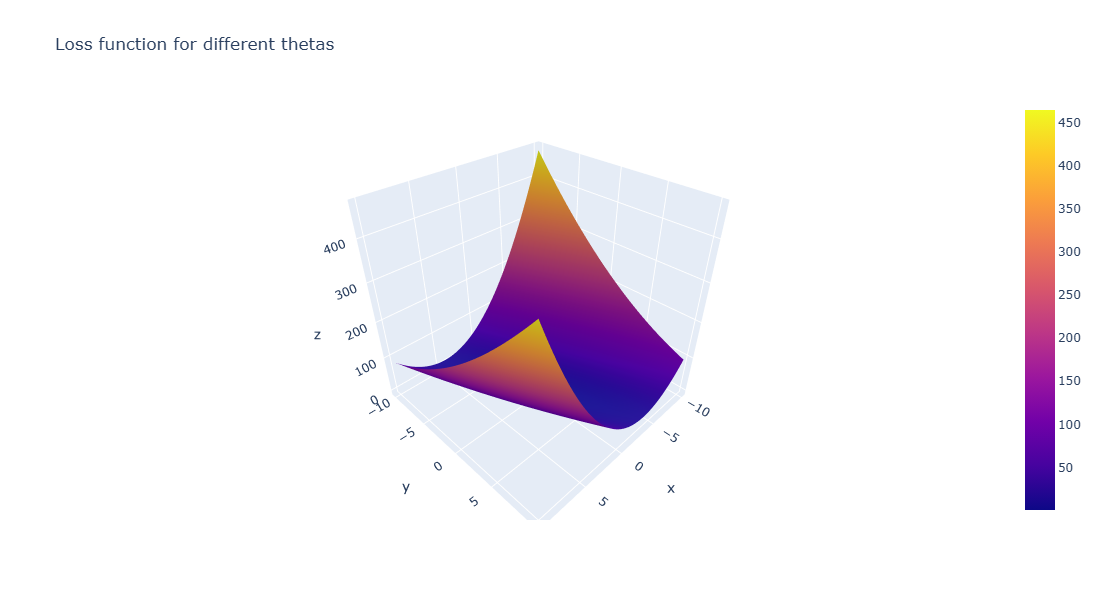

In [35]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

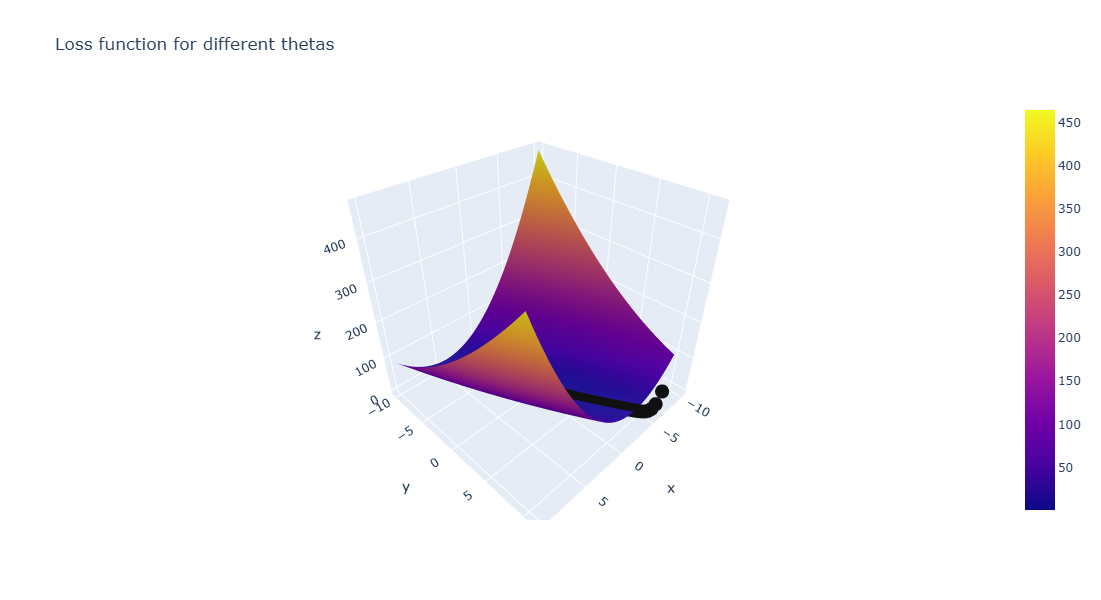

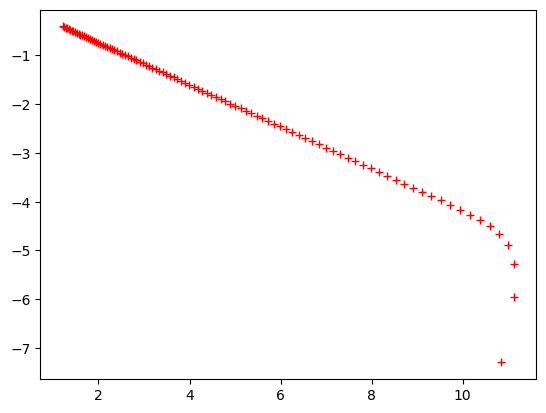

In [36]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [37]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=100 #<---start with the same iterations as above
theta_init=np.array([[5],[-2.5]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

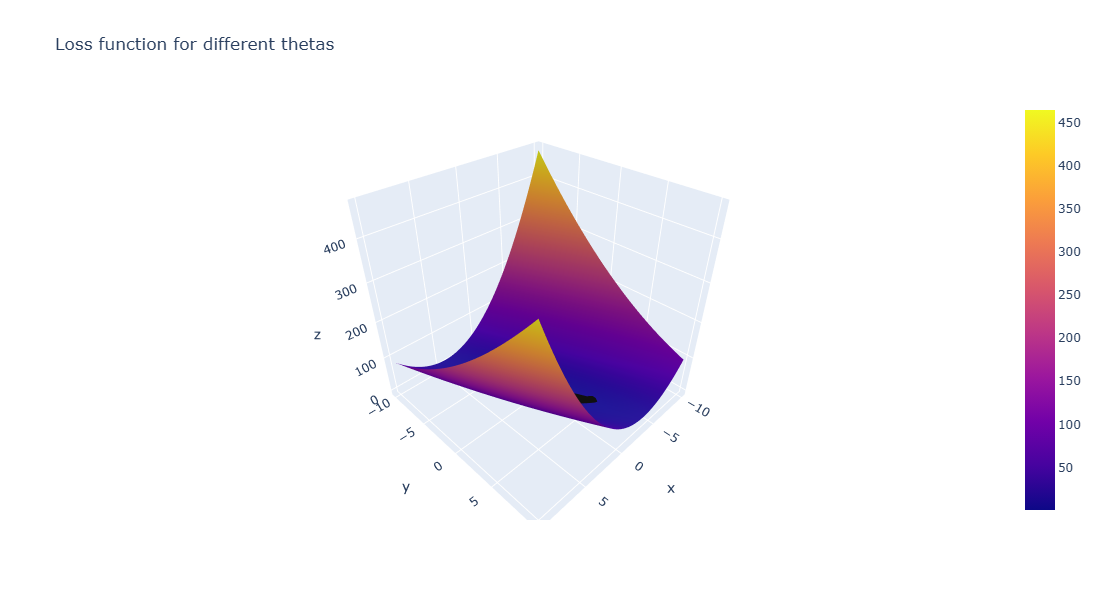

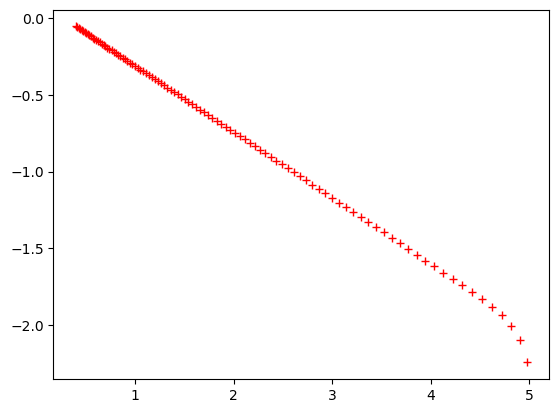

In [38]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

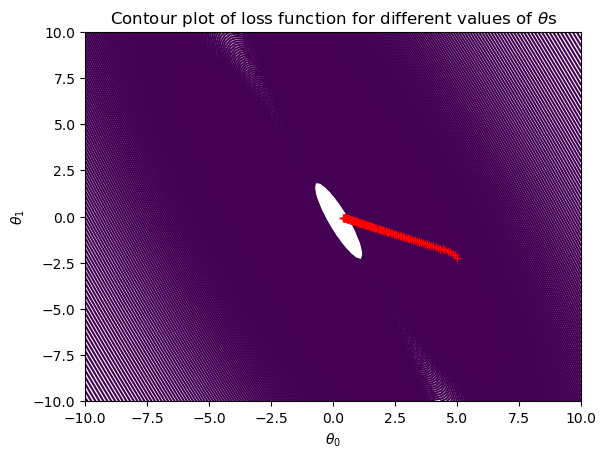

In [39]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');

plt.show()

In [40]:
#How well does gradient descent converge? How much do you need to adjust between different weather stations and years?